In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path_sales = r'D:\作品集\coffee\Coffee shop sample data (11.1.3+)\201904 sales reciepts.csv'
file_path_product = r'D:\作品集\coffee\Coffee shop sample data (11.1.3+)\product.csv'
file_path_customer = r'D:\作品集\coffee\Coffee shop sample data (11.1.3+)\customer.csv'

In [3]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
# 讀資料
datas = pd.read_csv(file_path_sales)
product = pd.read_csv(file_path_product)

In [4]:
#合併資料 data and product品項
result1=pd.merge(datas, product, 
          how='left', on=['product_id'])

In [5]:
#檢查數據 #確認沒有空值 
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             49894 non-null  int64  
 1   transaction_date           49894 non-null  object 
 2   transaction_time           49894 non-null  object 
 3   sales_outlet_id            49894 non-null  int64  
 4   staff_id                   49894 non-null  int64  
 5   customer_id                49894 non-null  int64  
 6   instore_yn                 49894 non-null  object 
 7   order                      49894 non-null  int64  
 8   line_item_id               49894 non-null  int64  
 9   product_id                 49894 non-null  int64  
 10  quantity                   49894 non-null  int64  
 11  line_item_amount           49894 non-null  float64
 12  unit_price                 49894 non-null  float64
 13  promo_item_yn              49894 non-null  obj

# 咖啡品項
大家最常買那些品項?
品項的SIZE?

In [6]:
#整理成新的table
temp1 = ['product','product_group','product_category','quantity','unit_price']
result2= result1[temp1]
fliter = (result2["product_category"] == "Coffee")
result2=result2[fliter]
result2['sale'] = result2['quantity'] * result2['unit_price'] 
grouped = result2.groupby('product').sum().reset_index()
grouped = grouped.sort_values(by='quantity', ascending=False) 
print("Grouped DataFrame:")
display(grouped)

Grouped DataFrame:


,product,product_group,product_category,quantity,unit_price,sale
15,Latte,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1531,3723.75,5741.25
10,Ethiopia Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1506,2934.00,4518.00
6,Columbian Medium Roast Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1502,2477.50,3755.00
11,Ethiopia Sm,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1492,2083.40,3282.40
16,Latte Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1489,4080.00,6328.25
1,Brazilian Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1477,2934.00,4431.00
18,Our Old Time Diner Blend Rg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1476,2430.00,3690.00
19,Our Old Time Diner Blend Sm,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1475,1940.00,2950.00
2,Brazilian Sm,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1465,2105.40,3223.00
12,Jamaican Coffee River Lg,BeveragesBeveragesBeveragesBeveragesBeveragesB...,CoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoffeeCoff...,1458,3652.50,5467.50


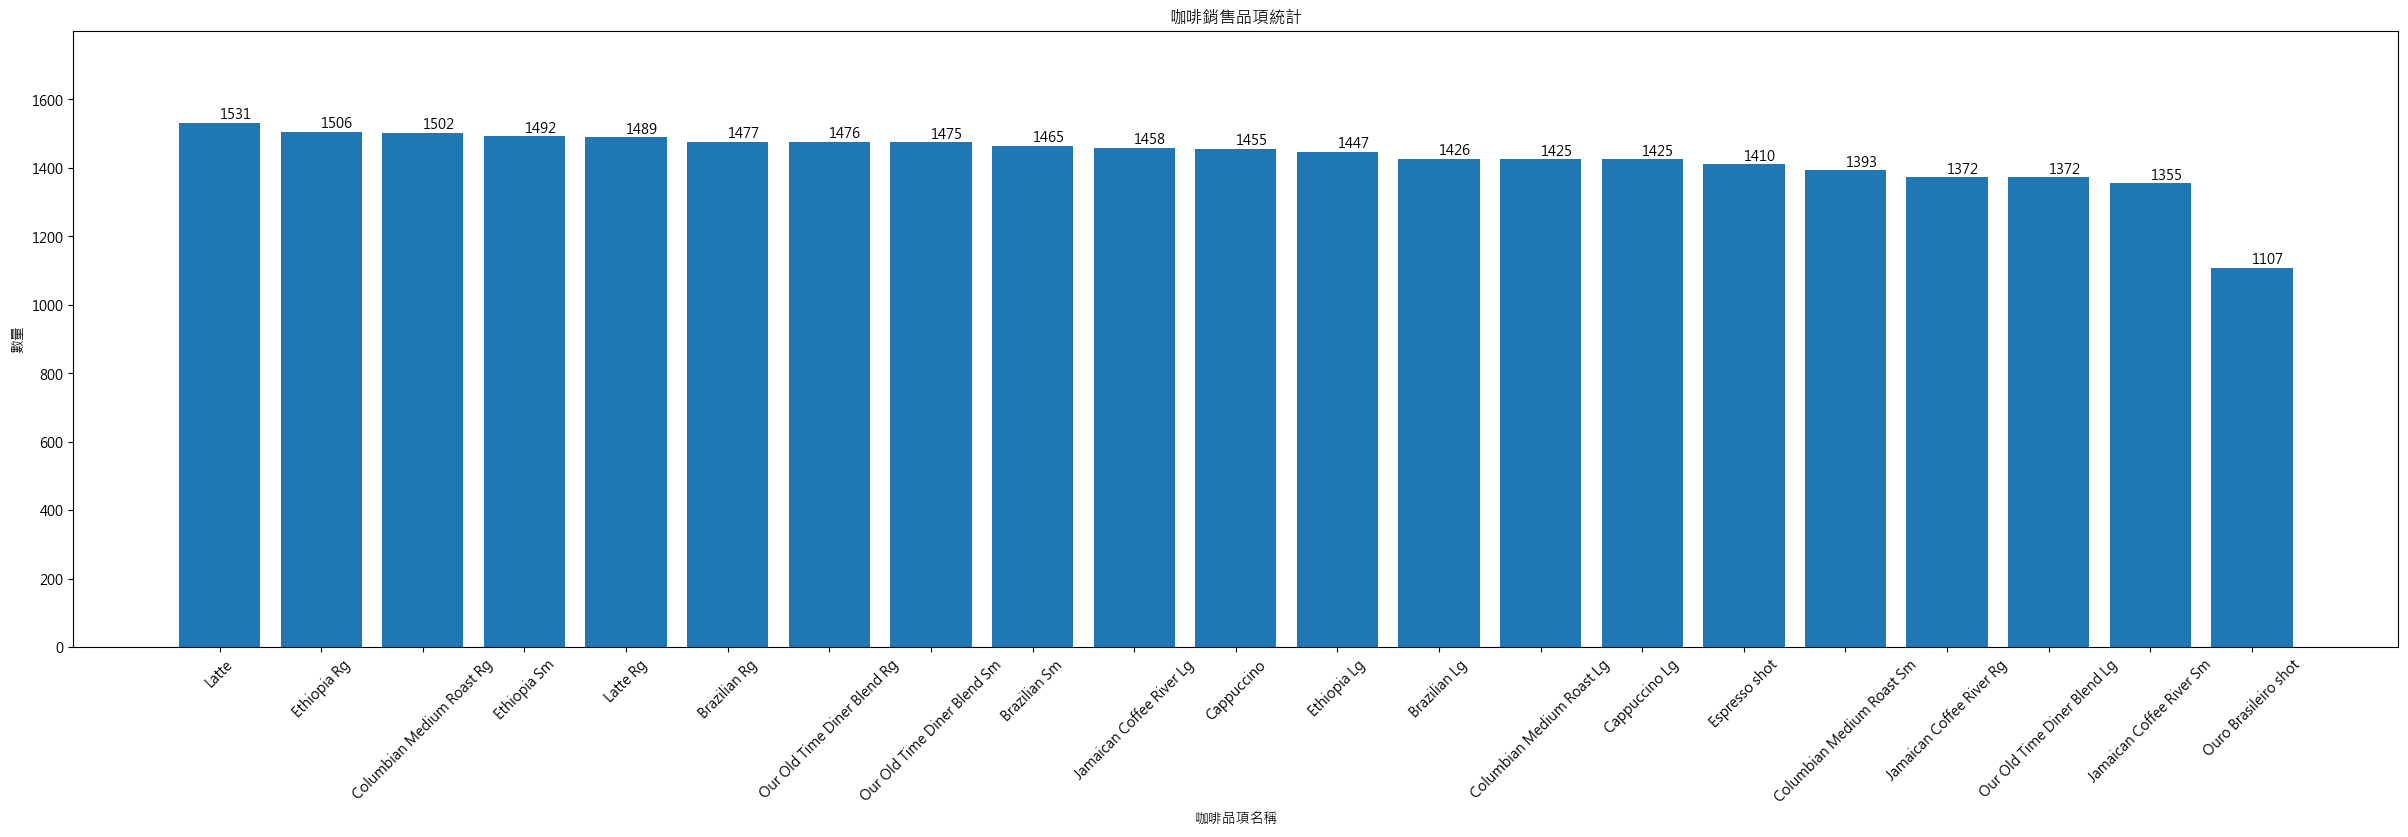

In [7]:
#畫圖
plt.figure(figsize=(30, 8))
bars=plt.bar(grouped['product'],grouped['quantity'])
plt.title('咖啡銷售品項統計')
plt.xlabel('咖啡品項名稱')
plt.ylabel('數量')
plt.ylim(0,1800) #設定y軸顯示範圍
#產生刻度陣列(npArray 類式list)
tick_arr = np.arange(0,1800,200)
plt.xticks(rotation=45) #設定刻度
plt.yticks(tick_arr) #空值代表隱藏刻度


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.show()

# 常買品項 
一個人每次買幾杯? (分三種品項分析)
一個人每日買多少杯? (不分品項分析)

In [8]:
# 讀資料
customer = pd.read_csv(file_path_customer)

In [9]:
#分析咖啡熱賣品項，一位會員一日會買多少杯?   
temp2 = ['transaction_date','product','quantity','customer_id']
result3= result1[temp2]
'''
fiter customer_id" != 0 因為customer id table 沒有customer id == 0 ，
但如果計算資料會跑出customer == 0 
'''
filter = (result3["product"].isin(["Latte", "Ethiopia Rg", "Columbian Medium Roast Rg"])) & (result3["customer_id"] != 0)
filtered_result = result3[filter] 
grouped_sum = filtered_result.groupby(['customer_id','transaction_date','product']).sum().reset_index()
grouped_sum =grouped_sum.sort_values(by=['transaction_date','product'])
product_max =grouped_sum.groupby(['product'])['quantity'].max()
product_min =grouped_sum.groupby(['product'])['quantity'].min()
product_median =grouped_sum.groupby(['product'])['quantity'].median()
product_mean =grouped_sum.groupby(['product'])['quantity'].mean()
print(product_max)
print(product_min)
print(product_median)
print(product_mean)

product
Columbian Medium Roast Rg    4
Ethiopia Rg                  4
Latte                        4
Name: quantity, dtype: int64
product
Columbian Medium Roast Rg    1
Ethiopia Rg                  1
Latte                        1
Name: quantity, dtype: int64
product
Columbian Medium Roast Rg    1.0
Ethiopia Rg                  2.0
Latte                        2.0
Name: quantity, dtype: float64
product
Columbian Medium Roast Rg    1.525292
Ethiopia Rg                  1.545833
Latte                        1.565815
Name: quantity, dtype: float64


In [10]:
#分析咖啡熱賣品項，一位會員30天內會買多少杯? 
sum_person_permonthly = filtered_result.groupby(['customer_id','product']).sum().reset_index()
monthly_product_max =sum_person_permonthly.groupby(['product'])['quantity'].max()
monthly_product_min =sum_person_permonthly.groupby(['product'])['quantity'].min()
monthly_product_median =sum_person_permonthly.groupby(['product'])['quantity'].median()
monthly_product_mean =sum_person_permonthly.groupby(['product'])['quantity'].mean()
print(monthly_product_max)
print(monthly_product_min)
print(monthly_product_median)
print(monthly_product_mean)

product
Columbian Medium Roast Rg    7
Ethiopia Rg                  7
Latte                        6
Name: quantity, dtype: int64
product
Columbian Medium Roast Rg    1
Ethiopia Rg                  1
Latte                        1
Name: quantity, dtype: int64
product
Columbian Medium Roast Rg    2.0
Ethiopia Rg                  2.0
Latte                        2.0
Name: quantity, dtype: float64
product
Columbian Medium Roast Rg    1.761798
Ethiopia Rg                  1.758294
Latte                        1.751648
Name: quantity, dtype: float64


# 會員來店次數

In [11]:
'''
會員來店次數
分析一位會員在30天內的來店次數，不論買任何品項?  
'''
temp2 = ['transaction_date','product','quantity','customer_id']
result3= result1[temp2]
#計數會員來店次數
result3['count'] = 1
filter =  (result3["customer_id"] != 0)
customer_filtered_result = result3[filter] 
customer_sum = customer_filtered_result.groupby(['customer_id']).sum().reset_index()
customer_sum_max = customer_sum['count'].max()
customer_sum_min = customer_sum['count'].min()
customer_sum_medium = customer_sum['count'].median()
customer_sum_mean = customer_sum['count'].mean()
print(customer_sum_max)
print(customer_sum_min)
print(customer_sum_medium)
print(customer_sum_mean)

31
1
10.0
11.064085447263018


C:\Users\eva\AppData\Local\Temp\ipykernel_9144\860370605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3['count'] = 1


# 販售品項的比例

sum_product_category DataFrame:


,product_category,quantity,proportion
0,Bakery,7764,10.820
1,Branded,255,0.355
2,Coffee,30058,41.888
3,Coffee beans,616,0.858
4,Drinking Chocolate,5848,8.150
5,Flavours,3466,4.830
6,Loose Tea,401,0.559
7,Packaged Chocolate,151,0.210
8,Tea,23199,32.329


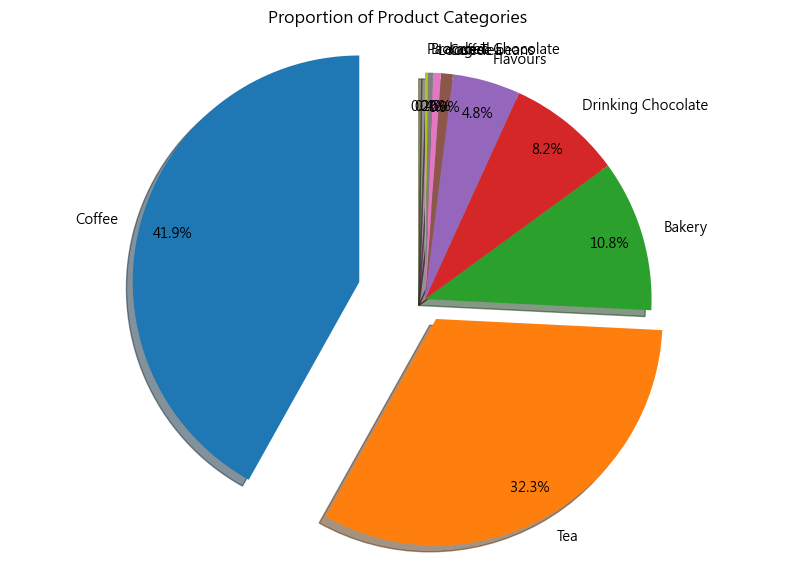

In [12]:
temp3 = ['product_category','quantity']
result4= result1[temp3]
sum_product_category = result4.groupby('product_category')['quantity'].sum().reset_index()
total_quantity = sum_product_category['quantity'].sum()
sum_product_category['proportion'] = (sum_product_category['quantity'] / total_quantity * 100).round(3)
print("sum_product_category DataFrame:")
display(sum_product_category)




labels = ['Bakery','Branded','Coffee','Coffee beans','Drinking Chocolate','Flavours','Loose Tea','Packaged Chocolate','Tea'] #標籤值
sizes = [10.82, 0.355, 41.888, 0.858, 8.15, 4.83, 0.559, 0.21, 32.329] #各標籤比例
explode = [0, 0, 0.3, 0,0,0,0,0,0.1] 

#按圖形比例大小排序
sorted_indices = np.argsort(sizes)[::-1]
labels = np.array(labels)[sorted_indices]
sizes = np.array(sizes)[sorted_indices]
explode = np.array(explode)[sorted_indices]


# pie（各比例, 移開, 標籤, 數值格式, 陰影, 轉向角度）
plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)
# 讓圓餅圖畫出來是圓形
plt.axis('equal')  
plt.title('Proportion of Product Categories')
plt.show()

# 分析咖啡熱賣品項前三項為 Latte、Ethiopia、Columbian Medium Roast
毛利? 

In [13]:
product.info()
temp4 = ['product_category','product','unit_of_measure','current_wholesale_price','current_retail_price(int)','tax_exempt_yn']
GF_product = product.copy()[temp4]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   product_id                 88 non-null     int64  
 1   product_group              88 non-null     object 
 2   product_category           88 non-null     object 
 3   product_type               88 non-null     object 
 4   product                    88 non-null     object 
 5   product_description        88 non-null     object 
 6   unit_of_measure            88 non-null     object 
 7   current_wholesale_price    88 non-null     float64
 8   current_retail_price(int)  88 non-null     float64
 9   current_retail_price       88 non-null     object 
 10  tax_exempt_yn              88 non-null     object 
 11  promo_yn                   88 non-null     object 
 12  new_product_yn             88 non-null     object 
dtypes: float64(2), int64(1), object(10)
memory usage: 9.

In [14]:
#計算毛利
GF_product['profit']=GF_product['current_retail_price(int)']-GF_product['current_wholesale_price']
print("GF_product DataFrame:")
display(GF_product)

GF_product DataFrame:


,product_category,product,unit_of_measure,current_wholesale_price,current_retail_price(int),tax_exempt_yn,profit
0,Coffee beans,Brazilian - Organic,12 oz,14.40,18.00,Y,3.60
1,Coffee beans,Our Old Time Diner Blend,12 oz,14.40,18.00,Y,3.60
2,Coffee beans,Espresso Roast,1 lb,11.80,14.75,Y,2.95
3,Coffee beans,Primo Espresso Roast,1 lb,16.36,20.45,Y,4.09
4,Coffee beans,Columbian Medium Roast,1 lb,12.00,15.00,Y,3.00
...,...,...,...,...,...,...,...
83,Flavours,Chocolate syrup,pump,0.04,0.80,Y,0.76
84,Coffee,Rio Nights,6 oz,1.20,6.00,Y,4.80
85,Coffee,Ouro Brasileiro shot,1.5 oz,0.60,3.00,Y,2.40
86,Coffee,Ouro Brasileiro shot promo,16 oz,0.42,2.10,Y,1.68


In [15]:
#篩選咖啡飲品
filter = (GF_product["product_category"]=="Coffee")
FC_GP_product= GF_product[filter]
FC_GP_product = FC_GP_product.sort_values(by='profit', ascending=False).reset_index(drop=True)
print("FC_GP_product DataFrame:")
display(FC_GP_product)

FC_GP_product DataFrame:


,product_category,product,unit_of_measure,current_wholesale_price,current_retail_price(int),tax_exempt_yn,profit
0,Coffee,Rio Nights,6 oz,1.20,6.00,Y,4.80
1,Coffee,Pumpkin Spice Latte Lg,3.0 oz,1.19,5.95,Y,4.76
2,Coffee,Pumpkin Spice Latte,1.5 oz,0.99,4.95,Y,3.96
3,Coffee,Cappuccino Lg,3.0 oz,0.85,4.25,Y,3.40
4,Coffee,Latte Rg,3.0 oz,0.85,4.25,Y,3.40
5,Coffee,Cappuccino,1.5 oz,0.75,3.75,Y,3.00
6,Coffee,Latte,1.5 oz,0.75,3.75,Y,3.00
7,Coffee,Jamaican Coffee River Lg,24 oz,0.75,3.75,Y,3.00
8,Coffee,Ethiopia Lg,24 oz,0.70,3.50,Y,2.80
9,Coffee,Brazilian Lg,24 oz,0.70,3.50,Y,2.80


In [16]:
#篩選熱門商品
filter = (GF_product["product"].isin(["Latte", "Ethiopia Rg", "Columbian Medium Roast Rg"]))
F_GP_product= GF_product[filter]
print("F_GP_product DataFrame:")
display(F_GP_product)

F_GP_product DataFrame:


,product_category,product,unit_of_measure,current_wholesale_price,current_retail_price(int),tax_exempt_yn,profit
28,Coffee,Columbian Medium Roast Rg,16 oz,0.50,2.50,Y,2.0
31,Coffee,Ethiopia Rg,16 oz,0.60,3.00,Y,2.4
37,Coffee,Latte,1.5 oz,0.75,3.75,Y,3.0
